In [23]:
import pandas as pd
import numpy as np

In [24]:
dogs = pd.read_csv('dogs.csv')
dogs.head()

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss


# data cleanup

## translate to english

In [25]:
dogs.rename(columns={'HALTER_ID': 'Owner_ID', 'ALTER': 'Owner_Age', 'GESCHLECHT': 'Owner_Gender',
                     'STADTKREIS': 'City_District', 'STADTQUARTIER': 'City_Quarter',
                     'RASSE1': 'Primary_Breed', 'RASSE1_MISCHLING': 'Primary_Breed_Hybrid',
                     'RASSE2': 'Secondary_Breed', 'RASSE2_MISCHLING': 'Secondary_Breed_Hybrid',
                     'RASSENTYP': 'Breed_Type', 'GEBURTSJAHR_HUND': 'Dog_Birth_Year',
                     'GESCHLECHT_HUND': 'Dog_Gender', 'HUNDEFARBE': 'Dog_Color'}, inplace=True)

## check for null

In [26]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6980 entries, 0 to 6979
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Owner_ID                6980 non-null   int64  
 1   Owner_Age               6978 non-null   object 
 2   Owner_Gender            6980 non-null   object 
 3   City_District           6978 non-null   float64
 4   City_Quarter            6978 non-null   float64
 5   Primary_Breed           6980 non-null   object 
 6   Primary_Breed_Hybrid    668 non-null    object 
 7   Secondary_Breed         537 non-null    object 
 8   Secondary_Breed_Hybrid  0 non-null      float64
 9   Breed_Type              6806 non-null   object 
 10  Dog_Birth_Year          6980 non-null   int64  
 11  Dog_Gender              6980 non-null   object 
 12  Dog_Color               6980 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 709.0+ KB


### drop unnecessary columns

In [27]:
null_columns = ['Primary_Breed_Hybrid', 'Secondary_Breed', 'Secondary_Breed_Hybrid']
dogs = dogs.drop(columns=null_columns, axis=1)
dogs.head()

,Owner_ID,Owner_Age,Owner_Gender,City_District,City_Quarter,Primary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color
0,126,51-60,m,9.0,92.0,Welsh Terrier,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,K,2011,m,schwarz/weiss


### check for data entry errors, or values that don't make sense

In [28]:
dogs['Dog_Birth_Year'].max()

5012

In [29]:
dogs.loc[dogs['Dog_Birth_Year'] == 5012]

,Owner_ID,Owner_Age,Owner_Gender,City_District,City_Quarter,Primary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color
4543,111954,41-50,w,3.0,34.0,Parson Russell Terrier,K,5012,m,tricolor


In [30]:
dogs = dogs.drop(dogs.index[[4543]])
dogs['Dog_Birth_Year'].max()  # good

2016

In [31]:
dogs['Dog_Birth_Year'].min()

1

In [32]:
dogs.loc[dogs['Dog_Birth_Year'] == 1]

,Owner_ID,Owner_Age,Owner_Gender,City_District,City_Quarter,Primary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color
3165,98411,71-80,w,11.0,119.0,Labrador Retriever,I,1,w,schwarz


In [33]:
dogs = dogs.drop(dogs.index[[3165]])
dogs['Dog_Birth_Year'].min()

8

In [34]:
dogs.loc[dogs['Dog_Birth_Year'] == 8]

,Owner_ID,Owner_Age,Owner_Gender,City_District,City_Quarter,Primary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color
2901,94655,41-50,w,2.0,24.0,Labrador Retriever,I,8,w,braun


In [35]:
dogs = dogs.drop(dogs.index[[2901]])
dogs['Dog_Birth_Year'].min()  # good

1962

In [36]:
dogs = dogs[(dogs['Primary_Breed'] != 'Chinese Foo Dog') & (dogs['Primary_Breed'] != 'Foo Dog gross')]

# 1. Does city region affect average size or quantity of dog(s) owned?

## Join with weight category data

In [37]:
dogs_weight = pd.read_csv('dogs_weight.csv')
dogs_weight.head()

,name_in_data,translation,weight_category,frequency
0,Mischling klein,mixed breed small,11-20,652
1,Chihuahua,chihuahua,1-10,495
2,Labrador Retriever,labrador retriever,71-80,446
3,Jack Russel Terrier,jack russell terrier,11-20,298
4,Yorkshire Terrier,yorkshire terrier,1-10,280


In [38]:
dogs_weight[['weight_lower_bound', 'weight_upper_bound']] = dogs_weight['weight_category'].str.split('-', expand=True)
dogs_weight.head()

,name_in_data,translation,weight_category,frequency,weight_lower_bound,weight_upper_bound
0,Mischling klein,mixed breed small,11-20,652,11,20
1,Chihuahua,chihuahua,1-10,495,1,10
2,Labrador Retriever,labrador retriever,71-80,446,71,80
3,Jack Russel Terrier,jack russell terrier,11-20,298,11,20
4,Yorkshire Terrier,yorkshire terrier,1-10,280,1,10


In [39]:
dogs_weight = dogs_weight.rename({'name_in_data': 'Primary_Breed'}, axis=1)
dogs_weight.head(1)

,Primary_Breed,translation,weight_category,frequency,weight_lower_bound,weight_upper_bound
0,Mischling klein,mixed breed small,11-20,652,11,20


### manipulation of columns

In [40]:
dogs_weight = dogs_weight.drop(['weight_category', 'frequency'], axis=1)
dogs_weight.head()

,Primary_Breed,translation,weight_lower_bound,weight_upper_bound
0,Mischling klein,mixed breed small,11,20
1,Chihuahua,chihuahua,1,10
2,Labrador Retriever,labrador retriever,71,80
3,Jack Russel Terrier,jack russell terrier,11,20
4,Yorkshire Terrier,yorkshire terrier,1,10


In [41]:
joined_dogs = pd.merge(dogs, dogs_weight, on='Primary_Breed')
joined_dogs.tail()

,Owner_ID,Owner_Age,Owner_Gender,City_District,City_Quarter,Primary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color,translation,weight_lower_bound,weight_upper_bound
6970,126607,51-60,m,11.0,115.0,Nackthund,K,2012,w,schwarz,Xoloitzcuintle,41,50
6971,126732,41-50,w,3.0,31.0,Australien Kelpie,I,2015,w,braun,Australian Kelpie,31,40
6972,126947,31-40,w,11.0,119.0,Chinese Powder Puff,K,2010,m,weiss,Chinese Crested dog,1,10
6973,128403,61-70,m,4.0,42.0,Wolfspitz,K,2014,m,tricolor,keeshond,31,40
6974,128406,31-40,w,7.0,74.0,Wäller,I,2015,w,fauve,waller,51,60


In [42]:
joined_dogs.dtypes

Owner_ID                int64
Owner_Age              object
Owner_Gender           object
City_District         float64
City_Quarter          float64
Primary_Breed          object
Breed_Type             object
Dog_Birth_Year          int64
Dog_Gender             object
Dog_Color              object
translation            object
weight_lower_bound     object
weight_upper_bound     object
dtype: object

In [43]:
joined_dogs['weight_lower_bound'] = joined_dogs['weight_lower_bound'].astype(int)
joined_dogs['weight_upper_bound'] = joined_dogs['weight_upper_bound'].astype(int)
joined_dogs.dtypes

Owner_ID                int64
Owner_Age              object
Owner_Gender           object
City_District         float64
City_Quarter          float64
Primary_Breed          object
Breed_Type             object
Dog_Birth_Year          int64
Dog_Gender             object
Dog_Color              object
translation            object
weight_lower_bound      int64
weight_upper_bound      int64
dtype: object

In [44]:
dogs_weight = pd.read_csv('dogs_weight.csv')
dogs_weight.head()

,name_in_data,translation,weight_category,frequency
0,Mischling klein,mixed breed small,11-20,652
1,Chihuahua,chihuahua,1-10,495
2,Labrador Retriever,labrador retriever,71-80,446
3,Jack Russel Terrier,jack russell terrier,11-20,298
4,Yorkshire Terrier,yorkshire terrier,1-10,280


In [45]:
dogs_weight[['weight_lower_bound', 'weight_upper_bound']] = dogs_weight['weight_category'].str.split('-', expand=True)
dogs_weight.head()

,name_in_data,translation,weight_category,frequency,weight_lower_bound,weight_upper_bound
0,Mischling klein,mixed breed small,11-20,652,11,20
1,Chihuahua,chihuahua,1-10,495,1,10
2,Labrador Retriever,labrador retriever,71-80,446,71,80
3,Jack Russel Terrier,jack russell terrier,11-20,298,11,20
4,Yorkshire Terrier,yorkshire terrier,1-10,280,1,10


In [46]:
dogs_weight = dogs_weight.rename({'name_in_data': 'Primary_Breed'}, axis=1)
dogs_weight.head(1)

,Primary_Breed,translation,weight_category,frequency,weight_lower_bound,weight_upper_bound
0,Mischling klein,mixed breed small,11-20,652,11,20


In [47]:
dogs_weight = dogs_weight.drop(['weight_category', 'frequency'], axis=1)
dogs_weight.head()

,Primary_Breed,translation,weight_lower_bound,weight_upper_bound
0,Mischling klein,mixed breed small,11,20
1,Chihuahua,chihuahua,1,10
2,Labrador Retriever,labrador retriever,71,80
3,Jack Russel Terrier,jack russell terrier,11,20
4,Yorkshire Terrier,yorkshire terrier,1,10


In [48]:
joined_dogs = pd.merge(dogs, dogs_weight, on='Primary_Breed')
joined_dogs.head()

,Owner_ID,Owner_Age,Owner_Gender,City_District,City_Quarter,Primary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color,translation,weight_lower_bound,weight_upper_bound
0,126,51-60,m,9.0,92.0,Welsh Terrier,K,2011,w,schwarz/braun,Welsh Terrier,11,20
1,84431,71-80,w,7.0,71.0,Welsh Terrier,K,2004,w,black/tan,Welsh Terrier,11,20
2,88455,41-50,w,7.0,74.0,Welsh Terrier,K,1999,m,schwarz/rot,Welsh Terrier,11,20
3,101835,41-50,w,8.0,82.0,Welsh Terrier,K,2010,m,braun/schwarz,Welsh Terrier,11,20
4,108769,61-70,m,3.0,31.0,Welsh Terrier,K,2010,w,black/tan,Welsh Terrier,11,20


In [49]:
joined_dogs['weight_lower_bound'] = joined_dogs['weight_lower_bound'].astype(int)
joined_dogs['weight_upper_bound'] = joined_dogs['weight_upper_bound'].astype(int)
joined_dogs.dtypes

Owner_ID                int64
Owner_Age              object
Owner_Gender           object
City_District         float64
City_Quarter          float64
Primary_Breed          object
Breed_Type             object
Dog_Birth_Year          int64
Dog_Gender             object
Dog_Color              object
translation            object
weight_lower_bound      int64
weight_upper_bound      int64
dtype: object

In [50]:
joined_dogs.groupby('City_Quarter')['Primary_Breed'].agg(lambda x: x.mode())

City_Quarter
2.0                        Zwergpudel
4.0                Deutscher Pinscher
6.0                 Lagotto Romagnolo
11.0     [Chihuahua, Mischling klein]
12.0                          Podenco
13.0                  Mischling klein
14.0                        Chihuahua
21.0                  Mischling klein
23.0                  Mischling klein
24.0               Labrador Retriever
31.0                  Mischling klein
33.0               Labrador Retriever
34.0                        Chihuahua
41.0                  Mischling klein
42.0              Jack Russel Terrier
44.0                  Mischling klein
51.0                  Mischling klein
52.0               Labrador Retriever
61.0                  Mischling klein
63.0                  Mischling klein
71.0               Labrador Retriever
72.0               Labrador Retriever
73.0                  Mischling klein
74.0                  Mischling klein
81.0                  Mischling klein
82.0                  Mischling klein

In [51]:
import geopandas as gpd

# source: https://cartographyvectors.com/map/776-zurich-large 

zurich = gpd.read_file('zurich_large.geojson')
zurich.head()

,name,created_at,updated_at,cartodb_id,geometry
0,Zürich,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,1,"MULTIPOLYGON (((8.62168 47.36010, 8.62174 47.3..."
1,Winterthur,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,2,"MULTIPOLYGON (((8.79535 47.46798, 8.79528 47.4..."
2,Uster,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,3,"MULTIPOLYGON (((8.74107 47.32149, 8.74065 47.3..."
3,Fischenthal,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,4,"MULTIPOLYGON (((8.97500 47.30712, 8.97459 47.3..."
4,Stallikon,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,41,"MULTIPOLYGON (((8.50679 47.28582, 8.50661 47.2..."


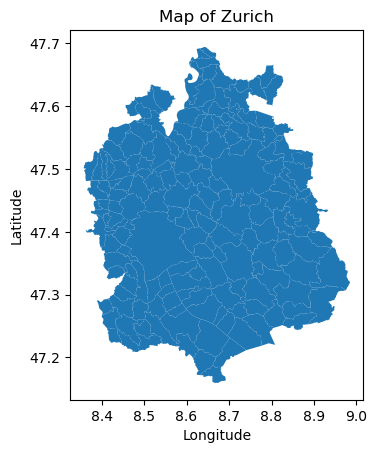

In [52]:
import matplotlib.pyplot as plt
zurich.plot()
plt.title('Map of Zurich')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [53]:
# join geojson and csv

zurich = zurich.rename({'cartodb_id': 'City_Quarter'}, axis=1)
zurich.head()

,name,created_at,updated_at,City_Quarter,geometry
0,Zürich,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,1,"MULTIPOLYGON (((8.62168 47.36010, 8.62174 47.3..."
1,Winterthur,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,2,"MULTIPOLYGON (((8.79535 47.46798, 8.79528 47.4..."
2,Uster,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,3,"MULTIPOLYGON (((8.74107 47.32149, 8.74065 47.3..."
3,Fischenthal,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,4,"MULTIPOLYGON (((8.97500 47.30712, 8.97459 47.3..."
4,Stallikon,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,41,"MULTIPOLYGON (((8.50679 47.28582, 8.50661 47.2..."


In [54]:
merged = zurich.merge(joined_dogs, on='City_Quarter', how='inner')
merged.head(5)

,name,created_at,updated_at,City_Quarter,geometry,Owner_ID,Owner_Age,Owner_Gender,City_District,Primary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color,translation,weight_lower_bound,weight_upper_bound
0,Winterthur,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,2,"MULTIPOLYGON (((8.79535 47.46798, 8.79528 47.4...",85988,NaN,m,2.0,Zwergpudel,K,2001,m,beige/weiss,miniature poodle,11,20
1,Fischenthal,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,4,"MULTIPOLYGON (((8.97500 47.30712, 8.97459 47.3...",81696,41-50,m,4.0,Deutscher Pinscher,I,2010,m,schwarz/rot,German Pinscher,31,40
2,Stallikon,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,41,"MULTIPOLYGON (((8.50679 47.28582, 8.50661 47.2...",87582,31-40,m,4.0,Labrador Retriever,I,2003,m,schwarz/weiss,labrador retriever,71,80
3,Stallikon,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,41,"MULTIPOLYGON (((8.50679 47.28582, 8.50661 47.2...",109138,51-60,m,4.0,Labrador Retriever,I,2011,w,schwarz,labrador retriever,71,80
4,Stallikon,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,41,"MULTIPOLYGON (((8.50679 47.28582, 8.50661 47.2...",115125,21-30,w,4.0,Labrador Retriever,I,2013,m,golden,labrador retriever,71,80


/opt/anaconda3/envs/cmps530/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


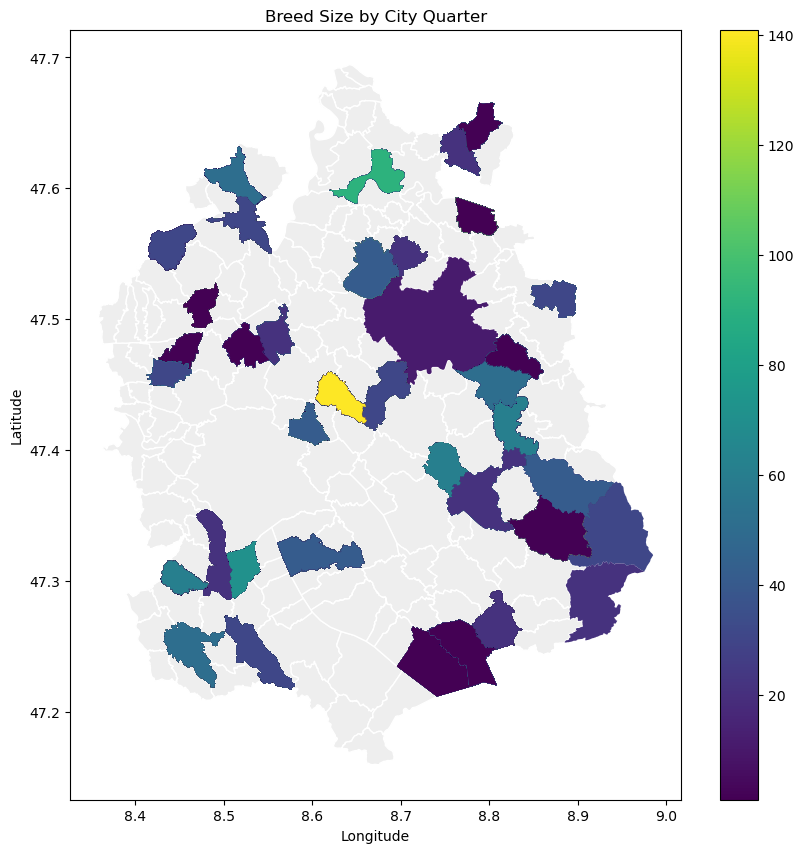

In [55]:
fig, ax = plt.subplots(1, figsize=(10, 10))
zurich.plot(color='#EEEEEE', edgecolor='#FFFFFF', ax=ax)
merged.plot(column='weight_lower_bound', cmap='viridis', legend=True, ax=ax)
plt.title('Breed Size by City Quarter')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [58]:
joined_dogs.head()

,Owner_ID,Owner_Age,Owner_Gender,City_District,City_Quarter,Primary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color,translation,weight_lower_bound,weight_upper_bound
0,126,51-60,m,9.0,92.0,Welsh Terrier,K,2011,w,schwarz/braun,Welsh Terrier,11,20
1,84431,71-80,w,7.0,71.0,Welsh Terrier,K,2004,w,black/tan,Welsh Terrier,11,20
2,88455,41-50,w,7.0,74.0,Welsh Terrier,K,1999,m,schwarz/rot,Welsh Terrier,11,20
3,101835,41-50,w,8.0,82.0,Welsh Terrier,K,2010,m,braun/schwarz,Welsh Terrier,11,20
4,108769,61-70,m,3.0,31.0,Welsh Terrier,K,2010,w,black/tan,Welsh Terrier,11,20


In [73]:
owner_count = joined_dogs['Owner_ID'].value_counts()
repeat_owners = owner_count[owner_count > 1].index
repeat_owners_df = joined_dogs[joined_dogs['Owner_ID'].isin(repeat_owners)]
repeat_owners_df

,Owner_ID,Owner_Age,Owner_Gender,City_District,City_Quarter,Primary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color,translation,weight_lower_bound,weight_upper_bound
23,86110,51-60,m,7.0,73.0,Cairn Terrier,K,2002,m,braun,cairn terrier,11,20
25,86262,41-50,w,7.0,71.0,Cairn Terrier,K,2007,w,rot,cairn terrier,11,20
27,87063,71-80,w,6.0,61.0,Cairn Terrier,K,2002,m,grau/schwarz,cairn terrier,11,20
29,87855,51-60,w,7.0,74.0,Cairn Terrier,K,2002,w,weizen,cairn terrier,11,20
30,87855,51-60,w,7.0,74.0,Cairn Terrier,K,2002,w,dunkel gestromt,cairn terrier,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,98577,61-70,m,7.0,72.0,Tiroler Bracke,I,2013,w,schwarz/rot,Tyrolean hound,41,50
6920,106194,41-50,m,6.0,63.0,Slovensky Cuvac,I,2014,m,weiss,slovak Cuvac,91,100
6921,108607,41-50,w,12.0,121.0,Deutscher Grossspitz,I,2011,m,weiss,German spitz,21,30
6922,108607,41-50,w,12.0,121.0,Deutscher Grossspitz,I,2011,w,weiss,German spitz,21,30


In [77]:
repeat_owners_df['Quantity_Dogs_Owned'] = repeat_owners_df.groupby('Owner_ID')['Owner_ID'].transform('count')
repeat_owners_df.head()

/var/folders/xb/hw2z17sd1798507bn6xl2y8r0000gn/T/ipykernel_78334/4033873656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_owners_df['Quantity_Dogs_Owned'] = repeat_owners_df.groupby('Owner_ID')['Owner_ID'].transform('count')


,Owner_ID,Owner_Age,Owner_Gender,City_District,City_Quarter,Primary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color,translation,weight_lower_bound,weight_upper_bound,Quantity_Dogs_Owned
23,86110,51-60,m,7.0,73.0,Cairn Terrier,K,2002,m,braun,cairn terrier,11,20,2
25,86262,41-50,w,7.0,71.0,Cairn Terrier,K,2007,w,rot,cairn terrier,11,20,2
27,87063,71-80,w,6.0,61.0,Cairn Terrier,K,2002,m,grau/schwarz,cairn terrier,11,20,2
29,87855,51-60,w,7.0,74.0,Cairn Terrier,K,2002,w,weizen,cairn terrier,11,20,2
30,87855,51-60,w,7.0,74.0,Cairn Terrier,K,2002,w,dunkel gestromt,cairn terrier,11,20,2


In [78]:
merged_repeats = zurich.merge(repeat_owners_df, on='City_Quarter', how='inner')
merged_repeats.head(5)

,name,created_at,updated_at,City_Quarter,geometry,Owner_ID,Owner_Age,Owner_Gender,City_District,Primary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color,translation,weight_lower_bound,weight_upper_bound,Quantity_Dogs_Owned
0,Stallikon,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,41,"MULTIPOLYGON (((8.50679 47.28582, 8.50661 47.2...",86124,71-80,m,4.0,Dackel,K,2001,m,rot,miniature dachshund,1,10,3
1,Stallikon,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,41,"MULTIPOLYGON (((8.50679 47.28582, 8.50661 47.2...",86124,71-80,m,4.0,Dackel,K,2001,m,rot,miniature dachshund,1,10,3
2,Stallikon,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,41,"MULTIPOLYGON (((8.50679 47.28582, 8.50661 47.2...",104140,61-70,m,4.0,Dackel,K,2001,w,saufarben,miniature dachshund,1,10,3
3,Stallikon,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,41,"MULTIPOLYGON (((8.50679 47.28582, 8.50661 47.2...",89158,61-70,m,4.0,Chihuahua,K,2005,m,beige,chihuahua,1,10,2
4,Stallikon,2013-02-25 11:09:23.655000+00:00,2013-02-25 11:09:23.931000+00:00,41,"MULTIPOLYGON (((8.50679 47.28582, 8.50661 47.2...",89158,61-70,m,4.0,Chihuahua,K,2005,m,beige,chihuahua,1,10,2


/opt/anaconda3/envs/cmps530/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


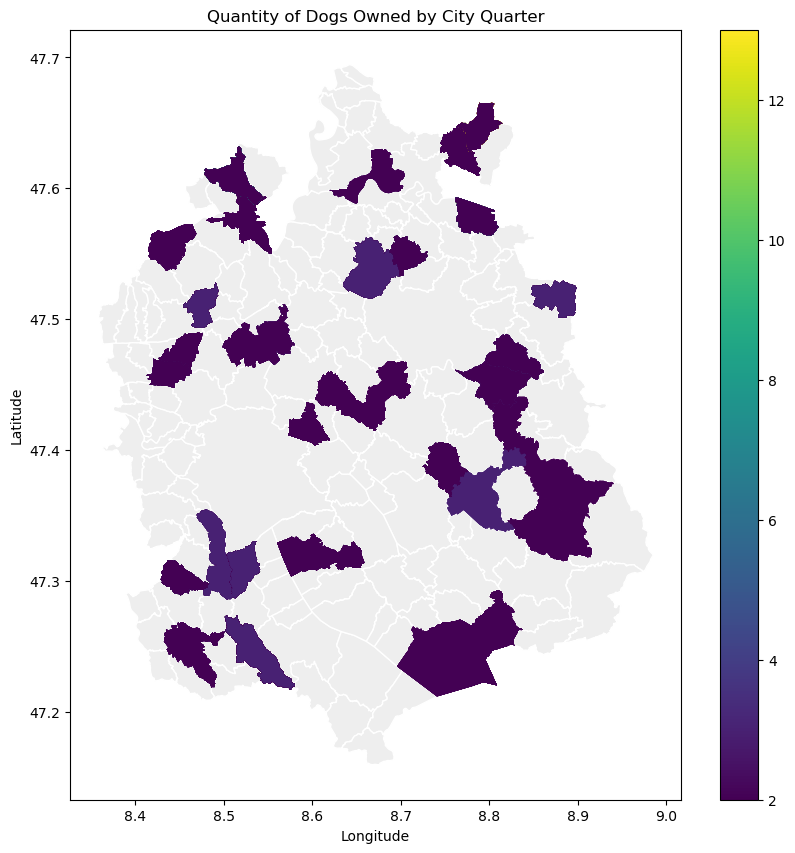

In [81]:
fig, ax = plt.subplots(1, figsize=(10, 10))
zurich.plot(color='#EEEEEE', edgecolor='#FFFFFF', ax=ax)
merged_repeats.plot(column='Quantity_Dogs_Owned', cmap='viridis', legend=True, ax=ax)
plt.title('Quantity of Dogs Owned by City Quarter')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 2. Are most dog owners in Zurich repeat dog owners? Do the repeat owners get smaller dogs as they get older?

In [56]:
joined_dogs.groupby('Owner_Age').agg({'weight_lower_bound': 'median', 'weight_upper_bound': 'median'})

,weight_lower_bound,weight_upper_bound
Owner_Age,,
11-20,11.0,20.0
21-30,11.0,20.0
31-40,21.0,30.0
41-50,11.0,20.0
51-60,11.0,20.0
61-70,11.0,20.0
71-80,21.0,30.0
81-90,21.0,30.0
91-100,11.0,20.0


In [57]:
joined_dogs.groupby('Owner_Age').agg({'weight_lower_bound': 'mean', 'weight_upper_bound': 'mean'})

,weight_lower_bound,weight_upper_bound
Owner_Age,,
11-20,19.292683,28.292683
21-30,25.193631,34.203822
31-40,31.026066,40.031596
41-50,29.838146,38.838146
51-60,30.751984,39.755291
61-70,29.258157,38.262956
71-80,30.284603,39.284603
81-90,27.195531,36.201117
91-100,31.000000,40.000000


# 3. Are most dogs in Zurich mixed breed or purebred? Why?